In [1]:
# Import Library
import numpy as np
import pandas as pd

In [2]:
# Read Data
df_can = pd.read_excel(
    'Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2
    )
print('Data download and read into dataframe!')

Data download and read into dataframe!


In [3]:
# Overview data
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
# print the dimensions of the dataframe
df_can.shape

(195, 43)

In [5]:
# Clean up the data
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis= 1, inplace= True)
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [6]:
# remane the column
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace= True)
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [7]:
# Make all columns labels of type string
df_can.columns = list(map(str,df_can.columns))

# set the country name as index
df_can.set_index('Country', inplace= True)

# add total column
df_can['Total'] = df_can.sum(axis = 1)

# years 
years = list(map(str, range(1980, 2014)))

print(df_can.shape)

(195, 38)


<ipython-input-7-48ae4bdbc925>:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis = 1)


In [8]:
# Visualizing Data using Matplotlib

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

# check version
print(mpl.__version__)

3.3.4


In [9]:
# group countries by continents and apply sum() function 
df_continents = df_can.groupby('Continent', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


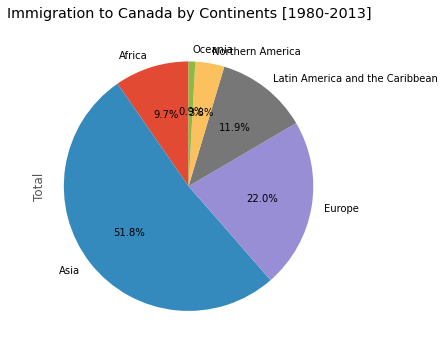

In [10]:
# plot the data

# auto create %, start angle represent starting point
df_continents['Total'].plot(kind= 'pie',
                           figsize= (5, 6),
                           autopct= '%1.1f%%', #add in percentage
                            startangle= 90, # start angle 90* (Africa)
                            shadow= False # add shadow
                           )

plt.title('Immigration to Canada by Continents [1980-2013]')
plt.axis('equal') #set the bar chart to look like a circle

plt.show()

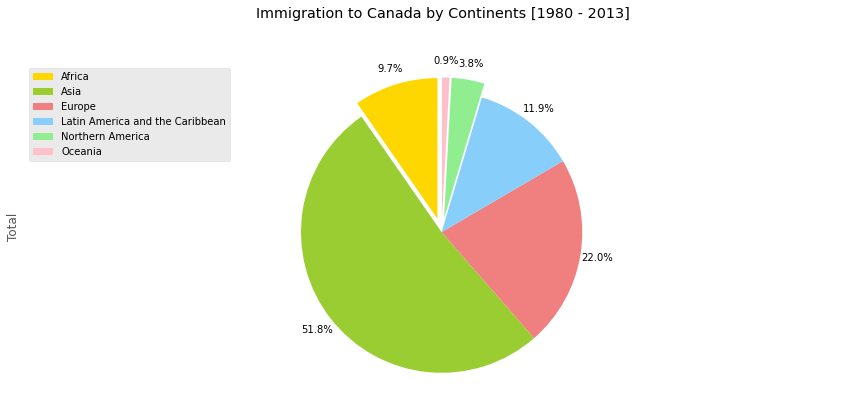

In [11]:
# make a few modifications to improve visual
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind= 'pie',
                           figsize= (15, 6),
                           autopct= '%1.1f%%',
                           startangle= 90,
                           shadow= False,
                           labels= None, # turn off labels on pie chart
                           pctdistance= 1.12, # the ratio between the center of each pie slice and the start of the text generated by autopct
                           colors= colors_list, # add custom colors
                           explode= explode_list) # 'explode' lowest 3 continents

# scale the title up by 12% to match with pctdistance
plt.title('Immigration to Canada by Continents [1980 - 2013]', y= 1.12)
plt.axis('equal')

# add legend
plt.legend(df_continents.index, loc= 'upper left')

plt.show()

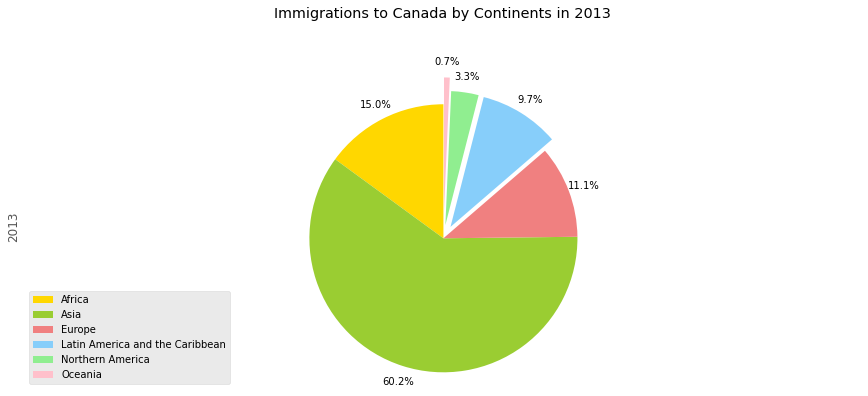

In [12]:
# Question: Use pie chart to explore the proportion of immigrants grouped by continents in year 2013

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0, 0, 0, 0.1, 0.1, 0.2]

df_continents['2013'].plot(kind= 'pie',
                          figsize= (15, 6),
                          autopct= '%1.1f%%',
                          startangle= 90,
                          shadow= False,
                          colors= colors_list,
                          explode= explode_list,
                          labels= None,
                          pctdistance= 1.12)

plt.title('Immigrations to Canada by Continents in 2013', y= 1.12)
plt.axis('equal')
plt.legend(labels= df_continents.index, loc= 'lower left')

plt.show()

In [14]:
# Boxplot
# Let's plot the box plot for the Japanese immigrants between 1980 - 2013.
# dataframe
df_japan = df_can.loc[['Japan'],years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


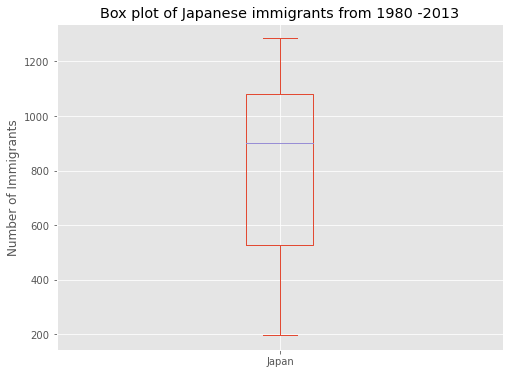

In [15]:
df_japan.plot(kind= 'box', figsize= (8, 6))

plt.title('Box plot of Japanese immigrants from 1980 -2013')
plt.ylabel('Number of Immigrants')

plt.show()

In [16]:
# Have a summary statistics
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


In [17]:
#  Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.

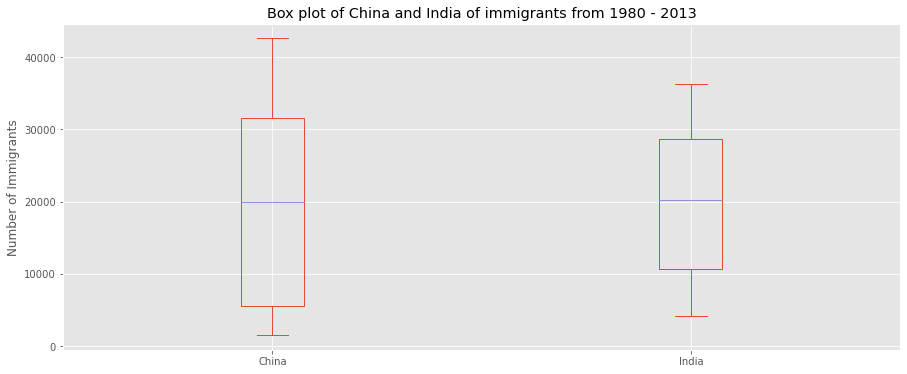

In [24]:
# Get dataframe
df_CI = df_can.loc[['China', 'India'], years].transpose()

df_CI.plot(kind= 'box', figsize= (15, 6))

plt.title('Box plot of China and India of immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

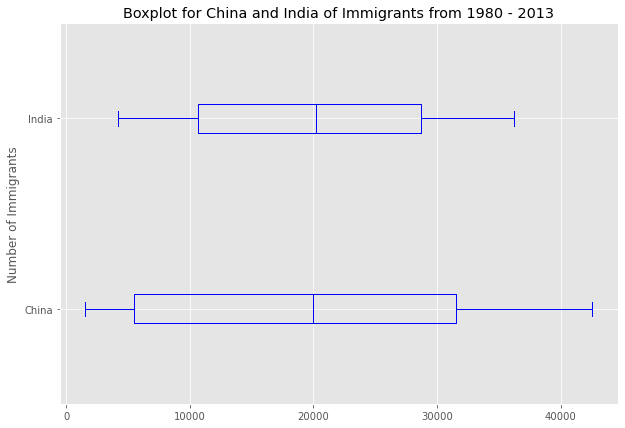

In [27]:
# Horizontal boxplot
df_CI = df_can.loc[['China','India'], years].transpose()

df_CI.plot(kind= 'box', figsize= (10, 7), color= 'blue', vert= False)

plt.title('Boxplot for China and India of Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

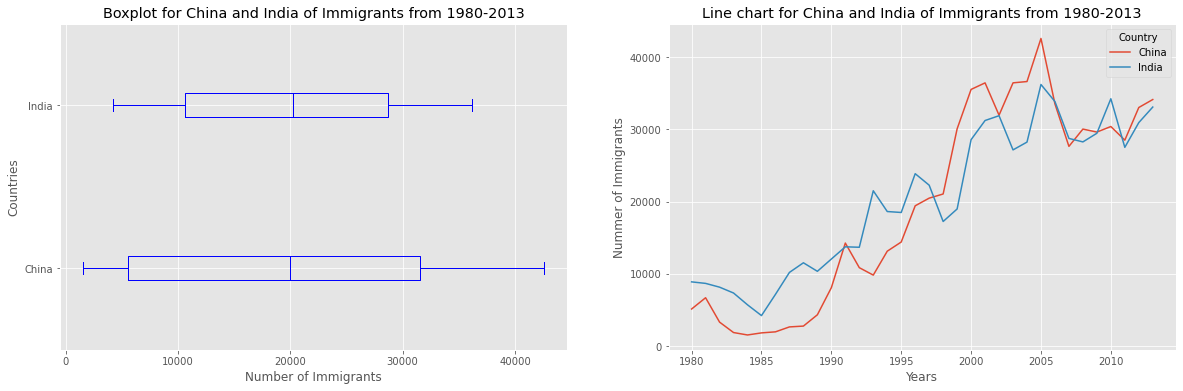

In [29]:
# Subplot
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1,2,1) #add subplot 1 (1 row, 2 columns, 1st subplot)
ax1 = fig.add_subplot(1,2,2) #add subplot 2 (1 row, 2 columns, 2nd subplot)

# Subplot 1
df_CI.plot(kind= 'box', figsize=(20,6), color= 'blue', vert= False, ax= ax0)

ax0.set_title('Boxplot for China and India of Immigrants from 1980-2013')
ax0.set_ylabel('Countries')
ax0.set_xlabel('Number of Immigrants')

# Subplot 2
df_CI.plot(kind= 'line', figsize= (20,6), ax= ax1)

ax1.set_title('Line chart for China and India of Immigrants from 1980-2013')
ax1.set_xlabel('Years')
ax1.set_ylabel('Nummer of Immigrants')

plt.show()

In [30]:
# Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the decades 1980s, 1990s, and 2000s.

In [34]:
df_top15 = df_can.sort_values('Total', ascending = False, axis= 0).head(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


In [40]:
# create a list of years
years_80s = list(map(str, range(1980,1990)))
years_90s = list(map(str,range(1990, 2000)))
years_00s = list(map(str, range(2000, 2010)))

# slide original dataframe
df_80s = df_top15.loc[:, years_80s].sum(axis= 1)
df_90s = df_top15.loc[:, years_90s].sum(axis= 1)
df_00s = df_top15.loc[:, years_00s].sum(axis= 1)

# merge dataframe
df_new = pd.DataFrame({'1980s': df_80s, '1990s':df_90s, '2000s':df_00s})

df_new.head()

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


In [42]:
# learn more about statistics
df_new.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


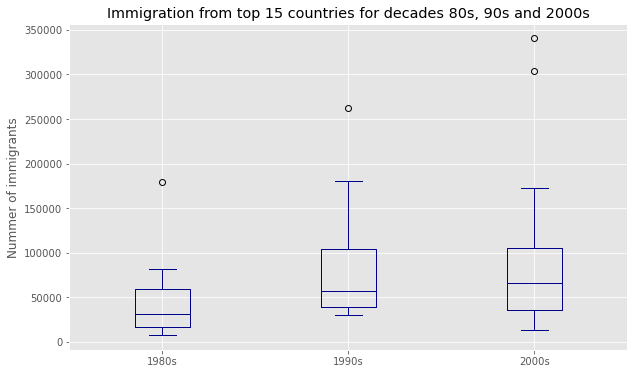

In [53]:
# plot th box plot

df_new.plot(kind= 'box', figsize= (10,6), color= 'darkblue')

plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')
plt.ylabel('Nummer of immigrants')

plt.show()

In [50]:
# Scatter plot
# Using a scatter plot, let's visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013.
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis= 0))

# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace= True)

# rename the columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


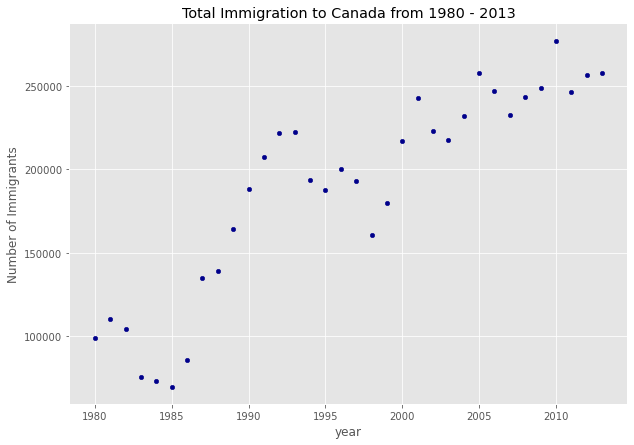

In [54]:
# plot the visual
df_tot.plot(kind= 'scatter', x= 'year', y= 'total', color= 'darkblue', figsize= (10,7))

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('year')
plt.ylabel('Number of Immigrants')

plt.show()

In [55]:
# let's try to plot a linear line of best fit, and use it to predict the number of immigrants in 2015.
# Get the equation of line of best fit. We will use Numpy's polyfit()
x = df_tot['year']
y = df_tot['total']

fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

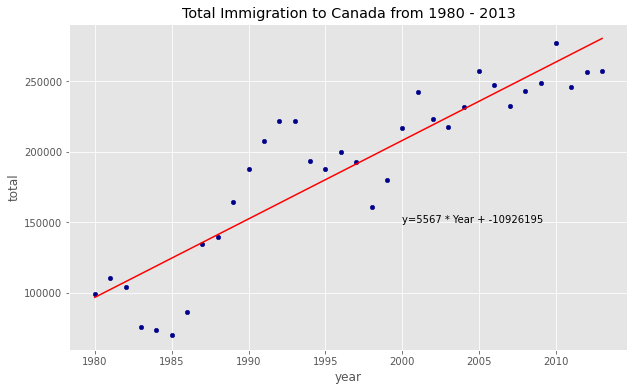

'No. Immigrants = 5567 * Year + -10926195'

In [58]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10,6), color= 'darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('year')
plt.ylabel('total')

# plot line of best fit
plt.plot(x, fit[0]*x + fit[1], color= 'red') #recall that x is the year
plt.annotate('y={0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]), xy=(2000,150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0],fit[1])

In [59]:
# Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?

In [74]:
# create df_countries dataframe
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
# create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))
# Change type of index
df_total.index = map(int,df_total.index)
# reset index in place
df_total.reset_index(inplace= True)

# rename column
df_total.columns = ['year', 'total']

# view data
df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


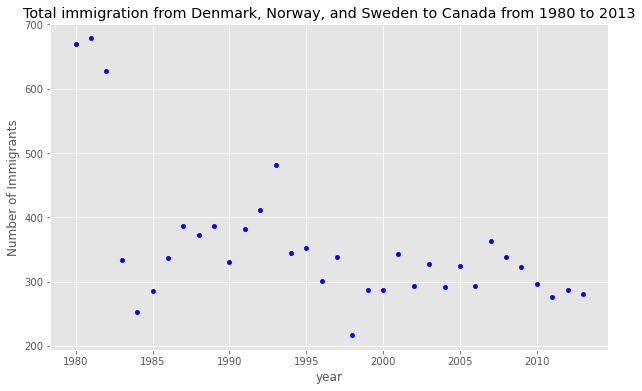

In [75]:
df_total.plot(kind='scatter', x='year', y='total', color='blue',figsize= (10,6))

plt.title('Total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013')
plt.xlabel('year')
plt.ylabel('Number of Immigrants')

plt.show()

In [76]:
# Bubble Plots
# Let's analyze the effect of this crisis, and compare Argentina's immigration to that of it's neighbour Brazil. Let's do that using a bubble plot of immigration from Brazil and Argentina for the years 1980 - 2013. We will set the weights for the bubble as the normalized value of the population for each year.

In [77]:
# transopose the dataframe
df_can_t = df_can[years].transpose()

# cast the index to type int
df_can_t.index = map(int,df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'year'

# reset the index to bringt the year as the colums
df_can_t.reset_index(inplace= True)

# view the data
df_can_t.head()

Country,year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


In [78]:
# There are several methods of normalizations in statistics, each with its own use. In this case, we will use feature scaling to bring all values into the range [0, 1]
# nomalize Brazil data
nor_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# nomalize Argentina data
nor_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

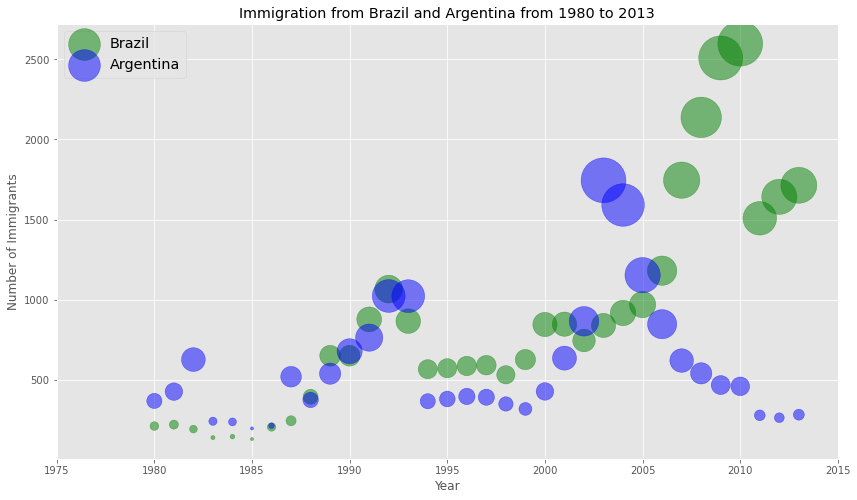

In [89]:
# plot data

# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=nor_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='year',
                    y='Argentina',
                    figsize=(14,8),
                    alpha=0.5,
                    color="blue",
                    s=nor_argentina * 2000 + 10,
                    ax=ax0
                    )

ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.set_ylabel('Number of Immigrants')
ax0.set_xlabel('Year')
ax0.legend(['Brazil','Argentina'], loc = 'upper left', fontsize = 'x-large');


In [90]:
# Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013

In [91]:
# nomalize China
nor_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())

# normalize India
nor_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())

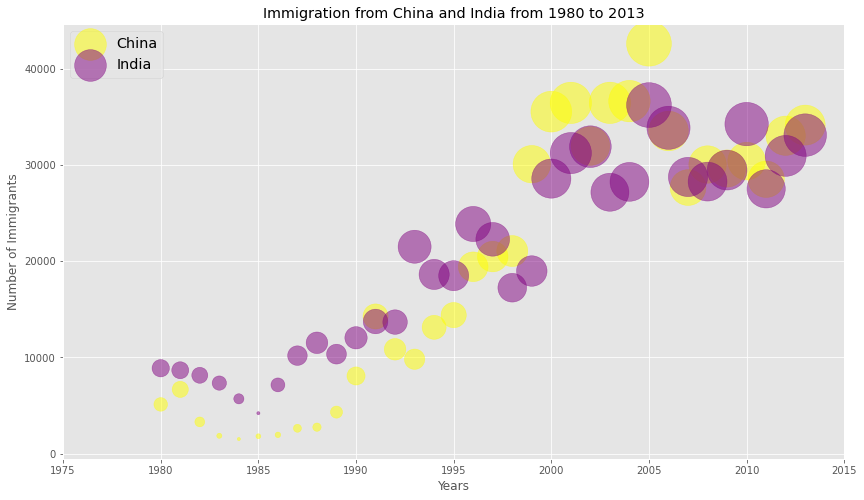

In [98]:
# Plot the bubble plot

# China
ax2 = df_can_t.plot(kind='scatter',
                   x='year',
                   y='China',
                   figsize= (14, 8),
                   alpha= 0.5,
                    color= 'yellow',
                   s=nor_china * 2000 + 10,
                   xlim= (1975, 2015))

# India
ax3 = df_can_t.plot(kind='scatter',
                   x='year',
                   y='India',
                    alpha = 0.5,
                   figsize= (14, 8),
                   color='purple',
                   s=nor_india * 2000 + 10,
                   ax= ax2)

ax2.set_title('Immigration from China and India from 1980 to 2013')
ax2.set_xlabel('Years')
ax2.set_ylabel('Number of Immigrants')
ax2.legend(['China','India'], loc= 'upper left', fontsize= 'x-large');